In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [4]:
x_train[1234].shape

(28, 28, 1)

In [5]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)
x_train =x_train/255
x_test = x_test/255

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation, Flatten
from keras.layers import Conv2D,MaxPool2D
from keras.optimizers import SGD

In [7]:
model =Sequential()
model.add(Conv2D(6,(4,4),padding='same',input_shape=(28,28,1))) #filter
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(12,(4,4),padding='same')) 
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(24,(4,4),padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(36,(4,4),padding='same')) 
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(15))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='mse',optimizer=SGD(lr=0.09),metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         102       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 6)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 12)        1164      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 12)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 12)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 24)          4632      
__________

In [9]:
conv=model.fit(x_train,y_train,batch_size=100,epochs=15)

Epoch 1/15
60000/60000 [==============================] - 12s 192us/step - loss: 0.0900 - acc: 0.1081
Epoch 2/15
60000/60000 [==============================] - 11s 188us/step - loss: 0.0898 - acc: 0.1141
Epoch 3/15
60000/60000 [==============================] - 11s 187us/step - loss: 0.0897 - acc: 0.1405
Epoch 4/15
60000/60000 [==============================] - 11s 188us/step - loss: 0.0893 - acc: 0.1713
Epoch 5/15
60000/60000 [==============================] - 11s 188us/step - loss: 0.0884 - acc: 0.2407
Epoch 6/15
60000/60000 [==============================] - 11s 187us/step - loss: 0.0800 - acc: 0.4223
Epoch 7/15
60000/60000 [==============================] - 11s 187us/step - loss: 0.0453 - acc: 0.6707
Epoch 8/15
60000/60000 [==============================] - 11s 189us/step - loss: 0.0254 - acc: 0.8282
Epoch 9/15
60000/60000 [==============================] - 11s 187us/step - loss: 0.0175 - acc: 0.8849
Epoch 10/15
60000/60000 [==============================] - 11s 188us/step - loss: 

In [10]:
score = model.evaluate(x_test,y_test)
score[1]
print('測試資料的 loss: %f'%(score[0]))
print('測試資料的正確率: %f'%(score[1]))

10000/10000 [==============================] - 1s 122us/step
測試資料的 loss: 0.006843
測試資料的正確率: 0.955800


<function matplotlib.pyplot.show(*args, **kw)>

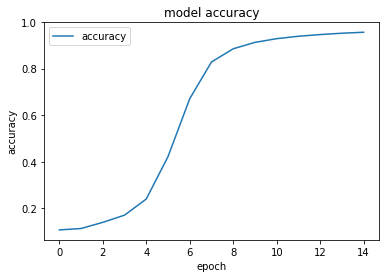

In [11]:
plt.plot(conv.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show